# Practice Manipulating Vector Data

For this practice, we will explore the following data sets:
 * http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
    * [Read more here](http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/)
 * http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_populated_places.zip
    * [Read more here](http://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-populated-places/)

## Data Set 1: 
 * Download the ZIP file to your `module3/temp/` folder.
 * Create `module4/temp/ne_admin_countries/` folder
 * Change into `ne_admin_countries` folder and unzip the Country Borders data into the folder.
   * Example files in folder after unpacking.
```BASH
module4/temp]$ find ne_admin_countries/
ne_admin_countries/
ne_admin_countries/ne_110m_admin_0_countries.README.html
ne_admin_countries/ne_110m_admin_0_countries.VERSION.txt
ne_admin_countries/ne_110m_admin_0_countries.cpg
ne_admin_countries/ne_110m_admin_0_countries.dbf
ne_admin_countries/ne_110m_admin_0_countries.prj
ne_admin_countries/ne_110m_admin_0_countries.shp
ne_admin_countries/ne_110m_admin_0_countries.shx
```

In [2]:
import os
import pandas as pd
import numpy as np
from shapely.geometry import Point
from random import randint, uniform
import matplotlib.pyplot as plt

import urllib.request
import shutil
from pathlib import Path
from zipfile import ZipFile

import geopandas as gpd

In [35]:
## M4:P1:Cell01
# Add Your Code to Download the File
# -----------------------------------------
# Designate the URL for a file
file_URL = 'http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip'

# Designate the local filename
local_file_name = 'ne_admin_countries.zip'

# Designate the local file name with a path to a temp directory.
     # Your Repo comes with this folder.  If not, use terminal and 
     # navigate to course folder > module3 and them : mkdir temp
file_Path = Path('../temp/')  
file_Path /= local_file_name

# Download the file from `url` and save it locally under `file_Path`:
with urllib.request.urlopen(file_URL) as response,  file_Path.open(mode='w+b') as out_file:
    shutil.copyfileobj(response, out_file)

# unzip file
to_unzip = ZipFile('../temp/ne_admin_countries.zip', 'r')
unzipped = '..temp/ne_admin_countries_unzipped'
to_unzip.extractall(unzipped)
to_unzip.close()
for file in os.listdir(unzipped):
    if file.endswith(".shp"):
        shape_file =  unzipped + '/' + file

If all went well, you can load the file with the next cell.

<span style="background:yellow">If you get any errors</span>, carefully resolve your issues until your directory structure under module 3 for the temp folder matches above!

In [36]:
## M4:P1:Cell02
# Add Your Code to load your data into a dataframe
# ------------------------------------------------

geodf = gpd.GeoDataFrame.from_file(shape_file)

In [37]:
## M4:P1:Cell03
# Add Your Code to Inspect the GeoDataFrame
# -----------------------------------------
geodf.head().transpose()

,0,1,2,3,4
ABBREV,Afg.,Ang.,Alb.,U.A.E.,Arg.
ABBREV_LEN,4,4,4,6,4
ADM0_A3,AFG,AGO,ALB,ARE,ARG
ADM0_A3_IS,AFG,AGO,ALB,ARE,ARG
ADM0_A3_UN,-99,-99,-99,-99,-99
ADM0_A3_US,AFG,AGO,ALB,ARE,ARG
ADM0_A3_WB,-99,-99,-99,-99,-99
ADM0_DIF,0,0,0,0,0
ADMIN,Afghanistan,Angola,Albania,United Arab Emirates,Argentina
BRK_A3,AFG,AGO,ALB,ARE,ARG


Review the columns and such of the data frame.
Answer the following Questions:
 1. What is the datatype of the geometric elements within this geospatial data file?
 1. What do you expect to be relevant fields for performing aggregation operations on the data frame and why?

In [38]:
geodf.dtypes

ABBREV         object
ABBREV_LEN    float64
ADM0_A3        object
ADM0_A3_IS     object
ADM0_A3_UN    float64
ADM0_A3_US     object
ADM0_A3_WB    float64
ADM0_DIF      float64
ADMIN          object
BRK_A3         object
BRK_DIFF      float64
BRK_GROUP      object
BRK_NAME       object
CONTINENT      object
ECONOMY        object
FIPS_10_       object
FORMAL_EN      object
FORMAL_FR      object
GDP_MD_EST    float64
GDP_YEAR      float64
GEOUNIT        object
GEOU_DIF      float64
GU_A3          object
HOMEPART      float64
INCOME_GRP     object
ISO_A2         object
ISO_A3         object
ISO_A3_EH      object
ISO_N3         object
LABELRANK     float64
               ...   
NAME_CIAWF     object
NAME_LEN      float64
NAME_LONG      object
NAME_SORT      object
NOTE_ADM0      object
NOTE_BRK       object
POP_EST       float64
POP_RANK      float64
POP_YEAR      float64
POSTAL         object
REGION_UN      object
REGION_WB      object
SOVEREIGNT     object
SOV_A3         object
SUBREGION 

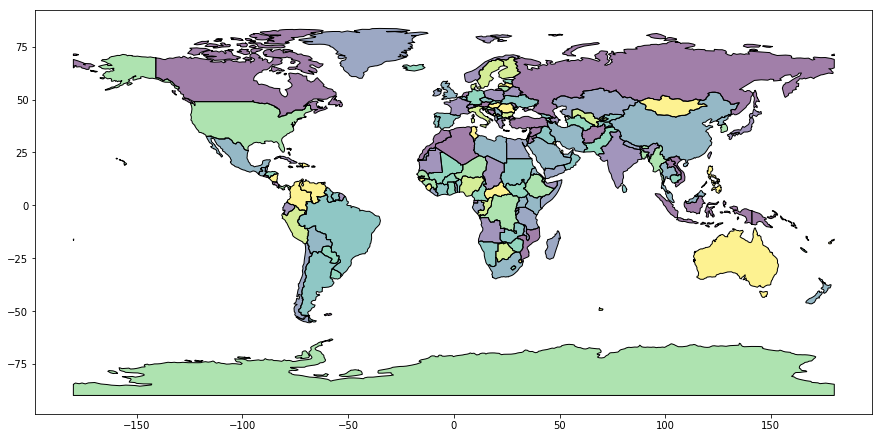

In [39]:
geodf.plot(figsize=(15,15))

Take a look at the GeoPandas API for Disolving
 * http://geopandas.org/aggregation_with_dissolve.html
 

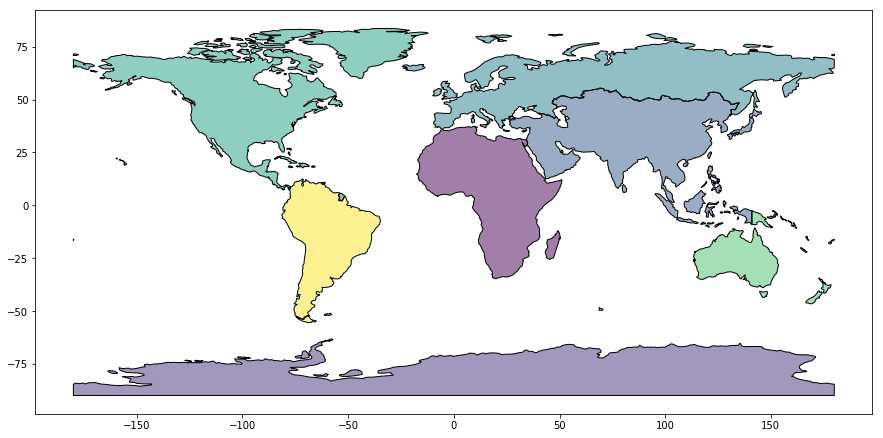

In [40]:
continents = geodf.dissolve(by='CONTINENT')
continents.plot(figsize=(15,15))

Now instead of looking at continents look at subregions. 

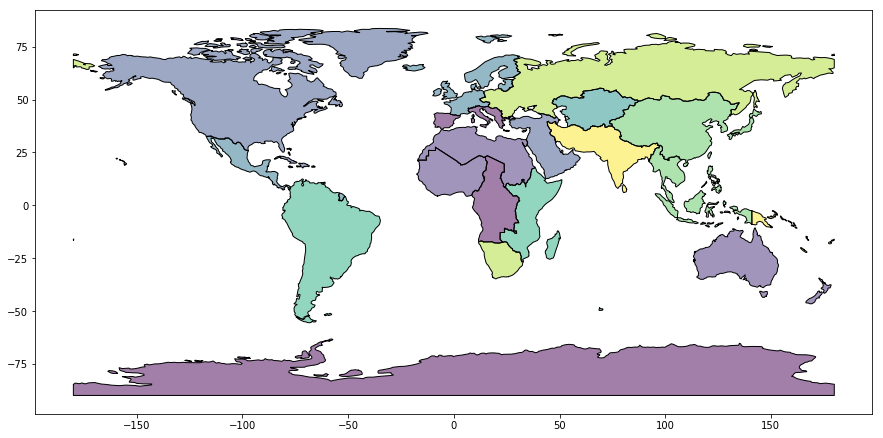

In [41]:
## M4:P1:Cell05
# Add Your Code to create a subregion dataframe and then plot it.
# ---------------------------------------------------------------
subregions = geodf.dissolve(by='SUBREGION')
subregions.plot(figsize=(15,15))


## Data Set 2: 
 * Download the ZIP file to your `module4/temp/` folder.
 * Create `module4/temp/ne_pop_places/` folder
 * Change into `ne_pop_places` folder and unzip the Populated Places data into the folder.
   * Example files in folder after unpacking.
```BASH
module3/temp]$ find ne_pop_places/
ne_pop_places/
ne_pop_places/ne_10m_populated_places.README.html
ne_pop_places/ne_10m_populated_places.VERSION.txt
ne_pop_places/ne_10m_populated_places.cpg
ne_pop_places/ne_10m_populated_places.dbf
ne_pop_places/ne_10m_populated_places.prj
ne_pop_places/ne_10m_populated_places.shp
ne_pop_places/ne_10m_populated_places.shx
```
Then load the file into a new Geo Data Frame

In [42]:
## M4:P1:Cell06
#  Add download code here
## Designate the URL for a file
file_URL = 'http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_populated_places.zip'

# Designate the local filename
local_file_name = 'ne_pop_places.zip'

# Designate the local file name with a path to a temp directory.
     # Your Repo comes with this folder.  If not, use terminal and 
     # navigate to course folder > module3 and them : mkdir temp
file_Path = Path('../temp/')  
file_Path /= local_file_name

# Download the file from `url` and save it locally under `file_Path`:
with urllib.request.urlopen(file_URL) as response,  file_Path.open(mode='w+b') as out_file:
    shutil.copyfileobj(response, out_file)

# unzip file
to_unzip = ZipFile('../temp/ne_pop_places.zip','r')
unzipped = '../temp/ne_pop_places'
to_unzip.extractall(unzipped)
to_unzip.close()
for file in os.listdir(unzipped):
    if file.endswith(".shp"):
        shape_file =  unzipped + '/' + file



#### Load and Examine the data!

In [45]:

#  Load into a GeoPanda Dataframe
# -------------------------------
import geopandas as gpd
pop_pl = gpd.read_file('../temp/ne_pop_places')


In [44]:
## M3:P1:Cell08
# Examine the data frame
# ----------------------
pop_pl.head().transpose()

,0,1,2,3,4
ADM0CAP,0,0,0,0,0
ADM0NAME,Uruguay,Uruguay,Uruguay,Uruguay,Uruguay
ADM0_A3,URY,URY,URY,URY,URY
ADM1NAME,Colonia,Flores,Río Negro,Canelones,Florida
ADMIN1_COD,4,6,12,2,7
CAPALT,0,0,0,0,0
CAPIN,,,,,
CHANGED,4,4,4,4,4
CHECKME,0,0,0,0,0
CITYALT,,,,,


### Merging Data 


We now have multiple data sets, so lets look at merging data.

As our dataframes contain a large number of columns, let's first create some simpler data frames. 

In [46]:
countries = geodf[['NAME_LONG','CONTINENT', 'SUBREGION','geometry', 'ISO_A3']]

countries.head()

,NAME_LONG,CONTINENT,SUBREGION,geometry,ISO_A3
0,Afghanistan,Asia,Southern Asia,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG
1,Angola,Africa,Middle Africa,(POLYGON ((23.90415368011818 -11.7222815894063...,AGO
2,Albania,Europe,Southern Europe,"POLYGON ((21.0200403174764 40.84272695572588, ...",ALB
3,United Arab Emirates,Asia,Western Asia,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE
4,Argentina,South America,South America,(POLYGON ((-66.95992000000001 -54.896810000000...,ARG


Now using the populated places dataframe create a new dataframe 'cities' with the following columns: ADM0NAME, CAPALT, WORLDCITY, geometry

In [47]:
## M4:P1:Cell09
#  Add dataframe column code here
# -------------------------------
cities=pop_pl[['ADM0NAME','CAPALT','WORLDCITY','geometry']]
cities.head()

,ADM0NAME,CAPALT,WORLDCITY,geometry
0,Uruguay,0,0.0,POINT (-57.84000247340134 -34.47999900541754)
1,Uruguay,0,0.0,POINT (-56.90099656015872 -33.5439989373607)
2,Uruguay,0,0.0,POINT (-58.3039974719095 -33.1389990288435)
3,Uruguay,0,0.0,POINT (-56.28400149324307 -34.53800400667546)
4,Uruguay,0,0.0,POINT (-56.21499844799416 -34.09900200521719)


Using a join, let's create a dataframe that includes all cities (included in our dataset) located in Europe.

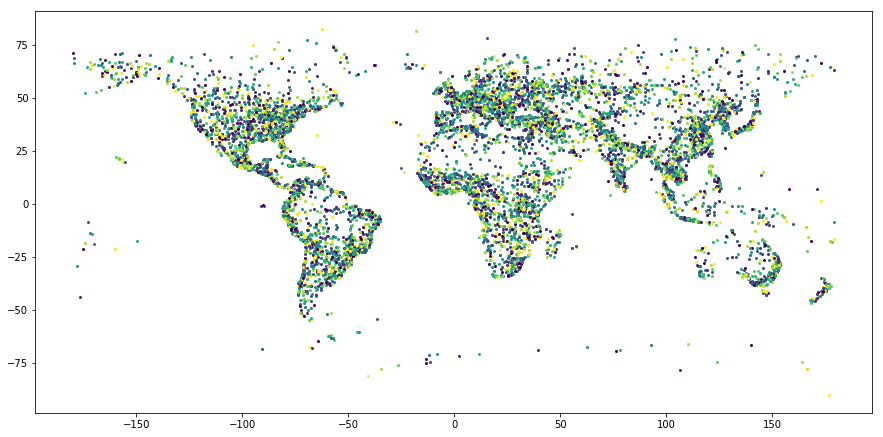

In [49]:
from geopandas.tools import sjoin
merge_cities = sjoin(cities, countries, how="left")

merge_cities.plot(figsize=(15,15))

Now we have a dataset 'merge' that has the city locations along with continent information. So now we can do a simple look at the cities in Europe. 

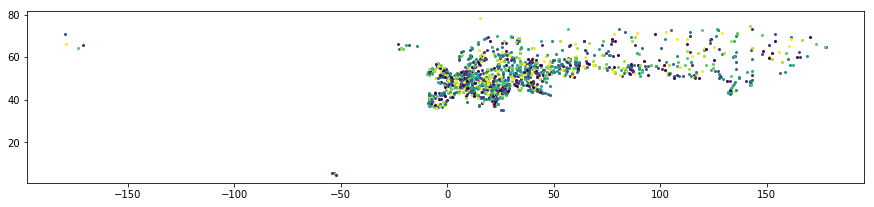

In [50]:
Europe_cities = merge_cities[merge_cities['CONTINENT'] == 'Europe']

Europe_cities.plot(figsize=(15,15))

In [51]:
Europe_cities.head()

,ADM0NAME,CAPALT,WORLDCITY,geometry,index_right,NAME_LONG,CONTINENT,SUBREGION,ISO_A3
86,Hungary,0,0.0,POINT (17.91099956850559 47.09099713733832),71,Hungary,Europe,Eastern Europe,HUN
87,Hungary,0,0.0,POINT (16.83999958610434 46.84400102663199),71,Hungary,Europe,Eastern Europe,HUN
88,Hungary,0,0.0,POINT (18.43299956827178 47.5499971770771),71,Hungary,Europe,Eastern Europe,HUN
89,Hungary,0,0.0,POINT (18.71299858158483 46.34399711484775),71,Hungary,Europe,Eastern Europe,HUN
90,Hungary,0,0.0,POINT (19.82600162636612 48.10500007944995),71,Hungary,Europe,Eastern Europe,HUN


Now let's do a right join on the same data.

In [53]:
## M4:P1:Cell10
#  Right merge of dataframes
# --------------------------

merge_countries = sjoin(cities, countries, how="right")
merge_countries.head()
# merge_countries.plot(figsize=(15,15))

,ADM0NAME,CAPALT,WORLDCITY,index_left,NAME_LONG,CONTINENT,SUBREGION,geometry,ISO_A3
index_right,,,,,,,,,
167,Uruguay,0.0,0.0,1,Uruguay,South America,South America,POLYGON ((-58.42707414410439 -33.9094544410575...,URY
167,Uruguay,0.0,0.0,3,Uruguay,South America,South America,POLYGON ((-58.42707414410439 -33.9094544410575...,URY
167,Uruguay,0.0,0.0,4,Uruguay,South America,South America,POLYGON ((-58.42707414410439 -33.9094544410575...,URY
167,Uruguay,0.0,0.0,574,Uruguay,South America,South America,POLYGON ((-58.42707414410439 -33.9094544410575...,URY
167,Uruguay,0.0,0.0,575,Uruguay,South America,South America,POLYGON ((-58.42707414410439 -33.9094544410575...,URY


Why is the result of this right join not very useful or is it? What information was lost in the join, and why?